In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


In [4]:
#Subset by Country
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")
USA = subset_samples(USA, Case_no!="C41")


In [5]:
#Subset by Organ (by country)

liver.fin = subset_samples(Fin, Organ=="Liver") #Finland only includes liver anyway

brain.ita = subset_samples(Ita, Organ=="Brain")
heart.ita = subset_samples(Ita, Organ=="Heart")
liver.ita = subset_samples(Ita, Organ=="Liver")
prostate.ita = subset_samples(Ita, Organ=="Prostate")
spleen.ita = subset_samples(Ita, Organ=="Spleen")
uterus.ita = subset_samples(Ita, Organ=="Uterus")

blood.usa = subset_samples(USA, Organ=="Blood")
brain.usa = subset_samples(USA, Organ=="Brain")
heart.usa = subset_samples(USA, Organ=="Heart")
liver.usa = subset_samples(USA, Organ=="Liver")
spleen.usa = subset_samples(USA, Organ=="Spleen")


In [6]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

### Estimate Shannon Diversity for all organs by country

In [20]:
#Italy by Organ

sha = estimate_richness(na.omit(Ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.ita = merge(sha, sample_tab, on="SampleID")

#Finland by Organ

sha = estimate_richness(na.omit(Fin), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.fin = merge(sha, sample_tab, on="SampleID")

#USA by Organ

sha = estimate_richness(na.omit(USA), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
dfsha.usa = merge(sha, sample_tab, on="SampleID")



### Check normality of data

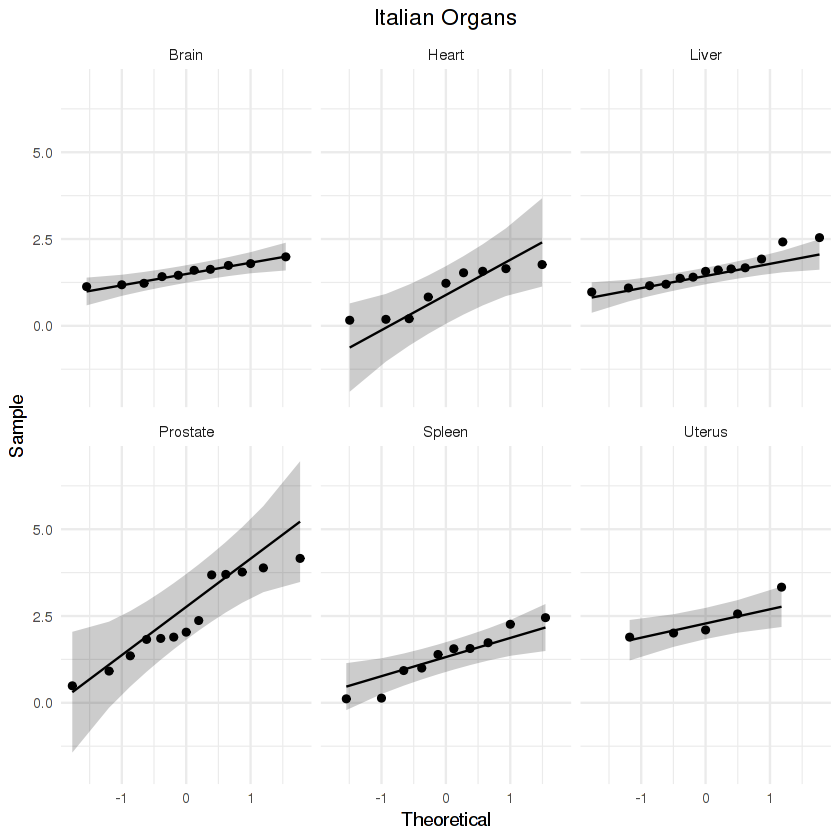

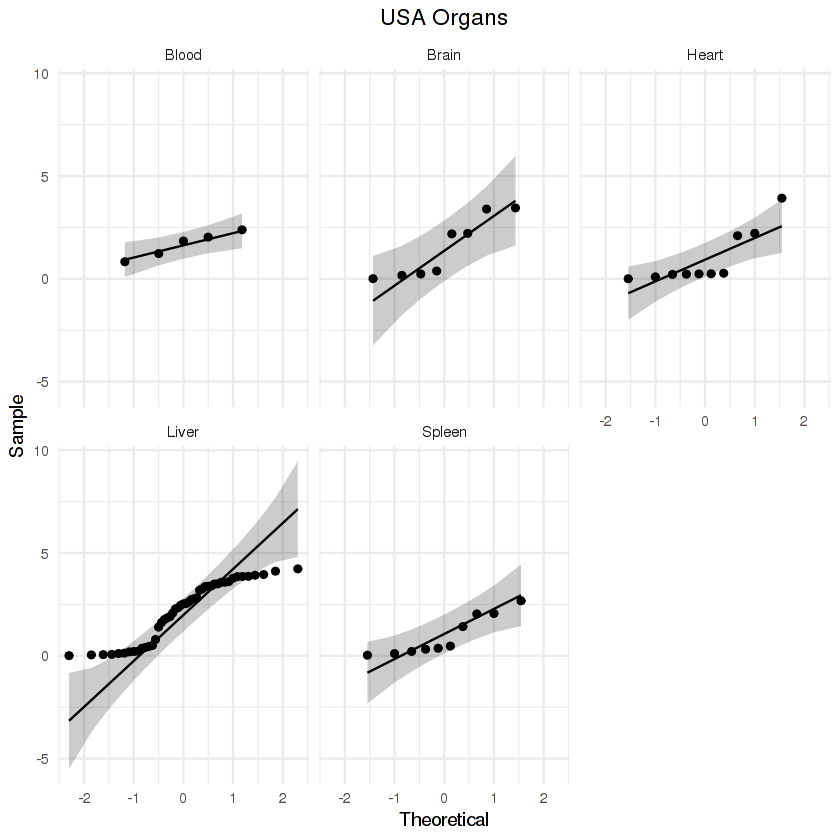

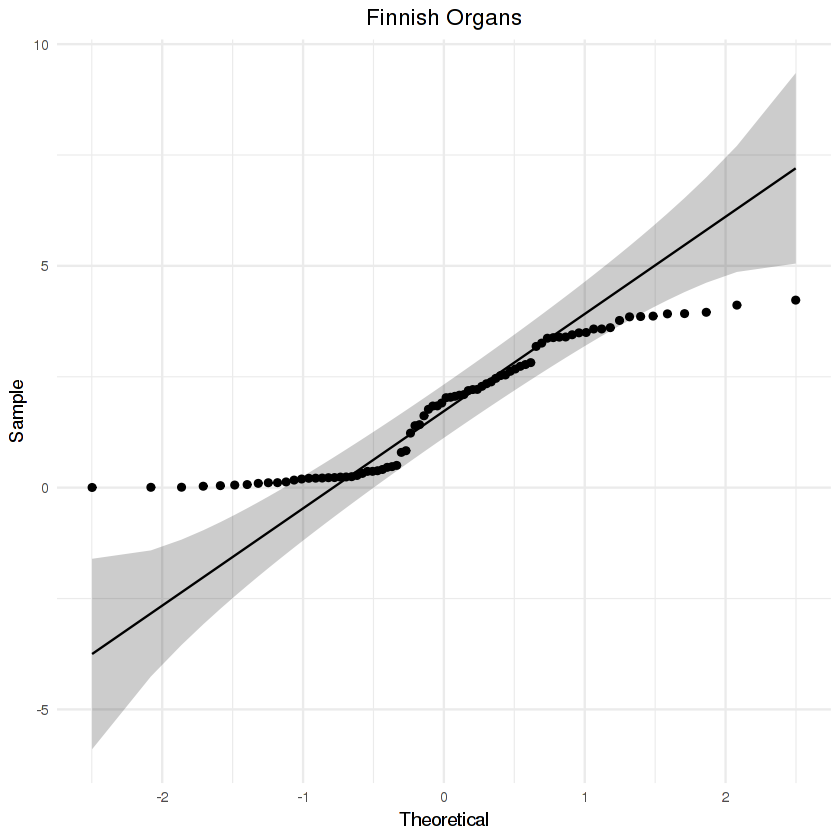

In [25]:
#Q-Q plots

p1 = ggqqplot(dfsha.ita, x = "Shannon") + ggtitle("Italian Organs")
p1 = p1 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = ggqqplot(dfsha.usa, x = "Shannon") + ggtitle("USA Organs")
p2 = p2 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p3 = ggqqplot(dfsha.usa, x = "Shannon") + ggtitle("Finnish Organs")
p3 = p3 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p1
p2
p3

### Plot linear regressions of all organs by country

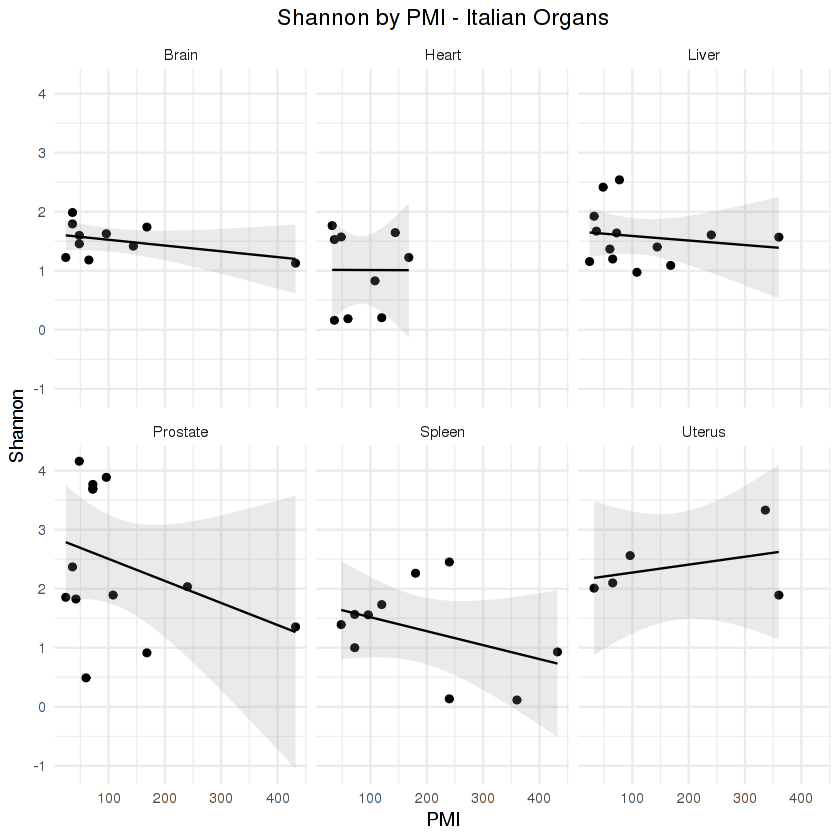

In [16]:
p = ggplot(dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p2 = p + facet_wrap(~Organ)
p2


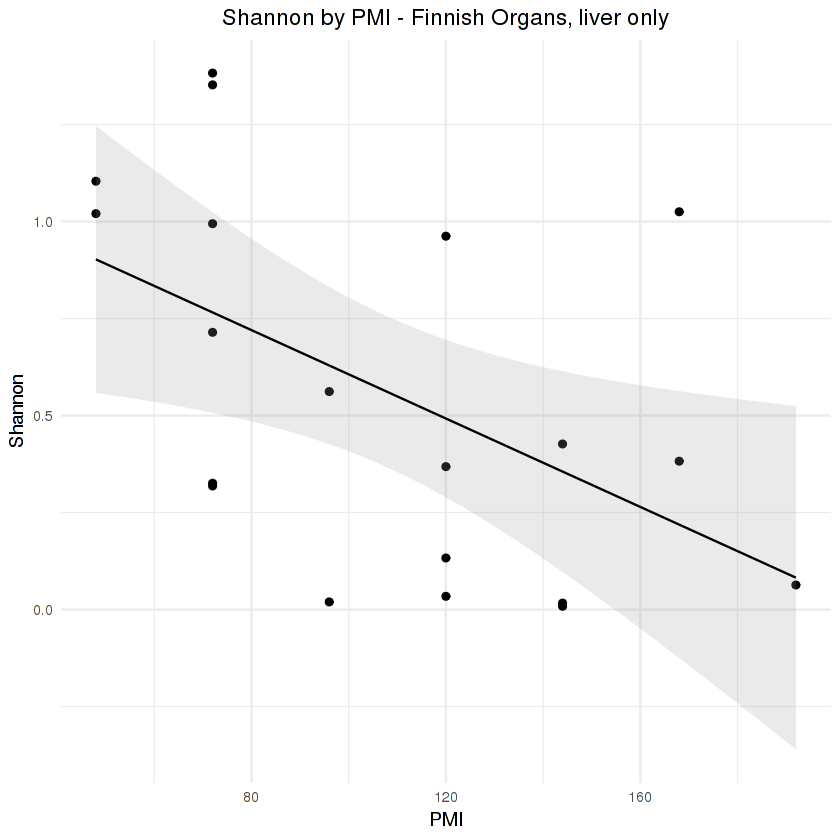

In [17]:
p = ggplot(dfsha.fin, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Finnish Organs, liver only")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p
#p2 = p + facet_wrap(~Organ)
#p2


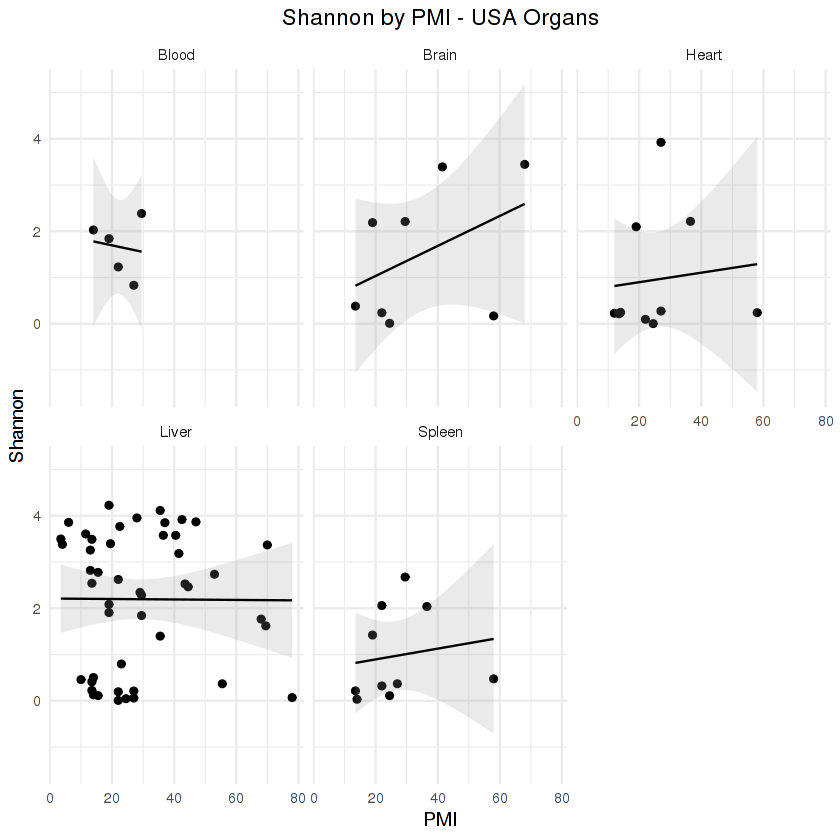

In [21]:
p = ggplot(dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = p + facet_wrap(~Organ)
p2


### Repeat regressions broken down by Organ and locality

In [7]:
#######
#Italy#
#######

#brain
sha = estimate_richness(na.omit(brain.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
brain.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#heart
sha = estimate_richness(na.omit(heart.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
heart.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#liver
sha = estimate_richness(na.omit(liver.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#prostate
sha = estimate_richness(na.omit(prostate.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
prostate.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#spleen
sha = estimate_richness(na.omit(spleen.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
spleen.dfsha.ita = merge(sha, sample_tab, on="SampleID")
#uterus
sha = estimate_richness(na.omit(uterus.ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
uterus.dfsha.ita = merge(sha, sample_tab, on="SampleID")

#####
#USA#
#####

#blood
sha = estimate_richness(na.omit(blood.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
blood.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#brain
sha = estimate_richness(na.omit(brain.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
brain.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#heart
sha = estimate_richness(na.omit(heart.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
heart.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#liver
sha = estimate_richness(na.omit(liver.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.usa = merge(sha, sample_tab, on="SampleID")
#spleen
sha = estimate_richness(na.omit(spleen.usa), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
spleen.dfsha.usa = merge(sha, sample_tab, on="SampleID")


#########
#Finland#
#########

#Liver only
sha = estimate_richness(na.omit(liver.fin), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)
liver.dfsha.fin = merge(sha, sample_tab, on="SampleID")


### Estimate fit for each organ by country

In [78]:
#Italian Brain
p1 = ggplot(brain.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian Brain")
p1 = p1 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p1b = ggplot(brain.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian Brain")
p1b = p1b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = brain.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.1306404,0.1306404,1.751676,0.2222368
Residuals,8,0.5966416,0.0745802,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = brain.dfsha.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3767 -0.1075 -0.0209  0.1784  0.3994 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.6230424  0.1184697  13.700 7.77e-07 ***
PMI         -0.0009784  0.0007393  -1.324    0.222    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2731 on 8 degrees of freedom
Multiple R-squared:  0.1796,	Adjusted R-squared:  0.07708 
F-statistic: 1.752 on 1 and 8 DF,  p-value: 0.2222


In [77]:
#Italian Heart
p2 = ggplot(heart.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian heart")
p2 = p2 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p2b = ggplot(heart.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian heart")
p2b = p2b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = heart.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,3.727747e-05,3.727747e-05,7.080853e-05,0.9935209
Residuals,7,3.685181e+00,5.264545e-01,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = heart.dfsha.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8542 -0.8069  0.2158  0.5575  0.7494 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.017e+00  4.773e-01   2.131   0.0706 .
PMI         -4.144e-05  4.924e-03  -0.008   0.9935  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7256 on 7 degrees of freedom
Multiple R-squared:  1.012e-05,	Adjusted R-squared:  -0.1428 
F-statistic: 7.081e-05 on 1 and 7 DF,  p-value: 0.9935


In [95]:
#Italian Liver
p3 = ggplot(liver.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian liver")
p3 = p3 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p3b = ggplot(liver.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian liver")
p3b = p3b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = liver.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.06731141,0.06731141,0.2748363,0.6105068
Residuals,11,2.69406047,0.24491459,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = liver.dfsha.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60916 -0.41769  0.02956  0.17991  0.93358 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.6664248  0.2122049   7.853 7.79e-06 ***
PMI         -0.0007691  0.0014671  -0.524    0.611    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4949 on 11 degrees of freedom
Multiple R-squared:  0.02438,	Adjusted R-squared:  -0.06432 
F-statistic: 0.2748 on 1 and 11 DF,  p-value: 0.6105


In [84]:
#Italian Spleen
p4 = ggplot(spleen.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian spleen")
p4 = p4 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p4b = ggplot(spleen.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian spleen")
p4b = p4b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = spleen.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.861088,0.8610880,1.462102,0.2611157
Residuals,8,4.711506,0.5889382,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = spleen.dfsha.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05177 -0.49903  0.00598  0.24498  1.26632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.753467   0.437113   4.011  0.00389 **
PMI         -0.002363   0.001955  -1.209  0.26112   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7674 on 8 degrees of freedom
Multiple R-squared:  0.1545,	Adjusted R-squared:  0.04884 
F-statistic: 1.462 on 1 and 8 DF,  p-value: 0.2611


In [85]:
#Italian Prostate
p5 = ggplot(prostate.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian prostate")
p5 = p5 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p5b = ggplot(prostate.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian prostate")
p5b = p5b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = prostate.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,2.121195,2.121195,1.429484,0.2569871
Residuals,11,16.322778,1.483889,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = prostate.dfsha.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.16452 -0.89575  0.05241  1.08988  1.46038 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.878325   0.488682   5.890 0.000105 ***
PMI         -0.003733   0.003122  -1.196 0.256987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.218 on 11 degrees of freedom
Multiple R-squared:  0.115,	Adjusted R-squared:  0.03455 
F-statistic: 1.429 on 1 and 11 DF,  p-value: 0.257


In [86]:
#Italian Uterus
p6 = ggplot(uterus.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian uterus")
p6 = p6 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p6b = ggplot(uterus.dfsha.ita, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Italian uterus")
p6b = p6b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


fit = lm(Shannon ~ PMI, data = uterus.dfsha.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.1777851,0.1777851,0.4388212,0.5550375
Residuals,3,1.2154277,0.4051426,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = uterus.dfsha.ita)

Residuals:
      1       2       3       4       5 
 0.2924  0.7410 -0.1733 -0.1293 -0.7308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 2.139834   0.458840   4.664   0.0186 *
PMI         0.001341   0.002024   0.662   0.5550  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6365 on 3 degrees of freedom
Multiple R-squared:  0.1276,	Adjusted R-squared:  -0.1632 
F-statistic: 0.4388 on 1 and 3 DF,  p-value: 0.555


In [87]:
#US Blood
p7 = ggplot(blood.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA blood")
p7 = p7 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p7b = ggplot(blood.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA blood")
p7b = p7b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


fit = lm(Shannon ~ PMI, data = blood.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.03139131,0.03139131,0.06148657,0.8201653
Residuals,3,1.53161808,0.51053936,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = blood.dfsha.usa)

Residuals:
      1       2       3       4       5 
 0.1304 -0.4381  0.2468  0.8242 -0.7632 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.98161    1.32396   1.497    0.231
PMI         -0.01429    0.05762  -0.248    0.820

Residual standard error: 0.7145 on 3 degrees of freedom
Multiple R-squared:  0.02008,	Adjusted R-squared:  -0.3066 
F-statistic: 0.06149 on 1 and 3 DF,  p-value: 0.8202


In [88]:
#US Brain
p8 = ggplot(brain.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA Brain")
p8 = p8 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p8b = ggplot(brain.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA Brain")
p8b = p8b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = brain.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,2.82992,2.829920,1.373724,0.2856004
Residuals,6,12.36021,2.060035,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = brain.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0973 -0.9387  0.2065  0.9484  1.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.38499    1.08184   0.356    0.734
PMI          0.03246    0.02769   1.172    0.286

Residual standard error: 1.435 on 6 degrees of freedom
Multiple R-squared:  0.1863,	Adjusted R-squared:  0.05068 
F-statistic: 1.374 on 1 and 6 DF,  p-value: 0.2856


In [89]:
#US Heart
p9 = ggplot(heart.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA heart")
p9 = p9 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p9b = ggplot(heart.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA heart")
p9b = p9b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = heart.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.179199,0.179199,0.0912093,0.7703477
Residuals,8,15.717603,1.964700,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = heart.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0492 -0.7917 -0.6032  0.7119  2.9525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.69362    0.97011   0.715    0.495
PMI          0.01028    0.03404   0.302    0.770

Residual standard error: 1.402 on 8 degrees of freedom
Multiple R-squared:  0.01127,	Adjusted R-squared:  -0.1123 
F-statistic: 0.09121 on 1 and 8 DF,  p-value: 0.7703


In [90]:
#US Liver
p10 = ggplot(liver.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA liver")
p10 = p10 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p10b = ggplot(liver.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA liver")
p10b = p10b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = liver.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.003778297,0.003778297,0.00176386,0.9666858
Residuals,45,96.392758018,2.142061289,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = liver.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1917 -1.7245  0.3372  1.2880  2.0271 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.2102664  0.4016141   5.503 1.69e-06 ***
PMI         -0.0004957  0.0118037  -0.042    0.967    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.464 on 45 degrees of freedom
Multiple R-squared:  3.92e-05,	Adjusted R-squared:  -0.02218 
F-statistic: 0.001764 on 1 and 45 DF,  p-value: 0.9667


In [91]:
#US Spleen
p11 = ggplot(spleen.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA spleen")
p11 = p11 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p11b = ggplot(spleen.dfsha.usa, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - USA spleen")
p11b = p11b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = spleen.dfsha.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,0.207175,0.207175,0.1961002,0.6696166
Residuals,8,8.451801,1.056475,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = spleen.dfsha.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8629 -0.7464 -0.6009  0.8481  1.6702 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.66126    0.77140   0.857    0.416
PMI          0.01165    0.02630   0.443    0.670

Residual standard error: 1.028 on 8 degrees of freedom
Multiple R-squared:  0.02393,	Adjusted R-squared:  -0.09808 
F-statistic: 0.1961 on 1 and 8 DF,  p-value: 0.6696


In [92]:
#Finnish Liver (only liver from Finland)
p12 = ggplot(liver.dfsha.fin, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Finnish liver")
p12 = p12 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
p12b = ggplot(liver.dfsha.fin, aes(x=PMI, y=Shannon)) + geom_point() +  ggtitle("Shannon by PMI - Finnish liver")
p12b = p12b + geom_smooth(se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Shannon ~ PMI, data = liver.dfsha.fin)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
PMI,1,1.102801,1.1028014,6.411022,0.02086983
Residuals,18,3.096297,0.1720165,NA,NA



Call:
lm(formula = Shannon ~ PMI, data = liver.dfsha.fin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60936 -0.35017 -0.03507  0.20824  0.80625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.175954   0.260078   4.522 0.000264 ***
PMI         -0.005697   0.002250  -2.532 0.020870 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4147 on 18 degrees of freedom
Multiple R-squared:  0.2626,	Adjusted R-squared:  0.2217 
F-statistic: 6.411 on 1 and 18 DF,  p-value: 0.02087


### Print plots for figures

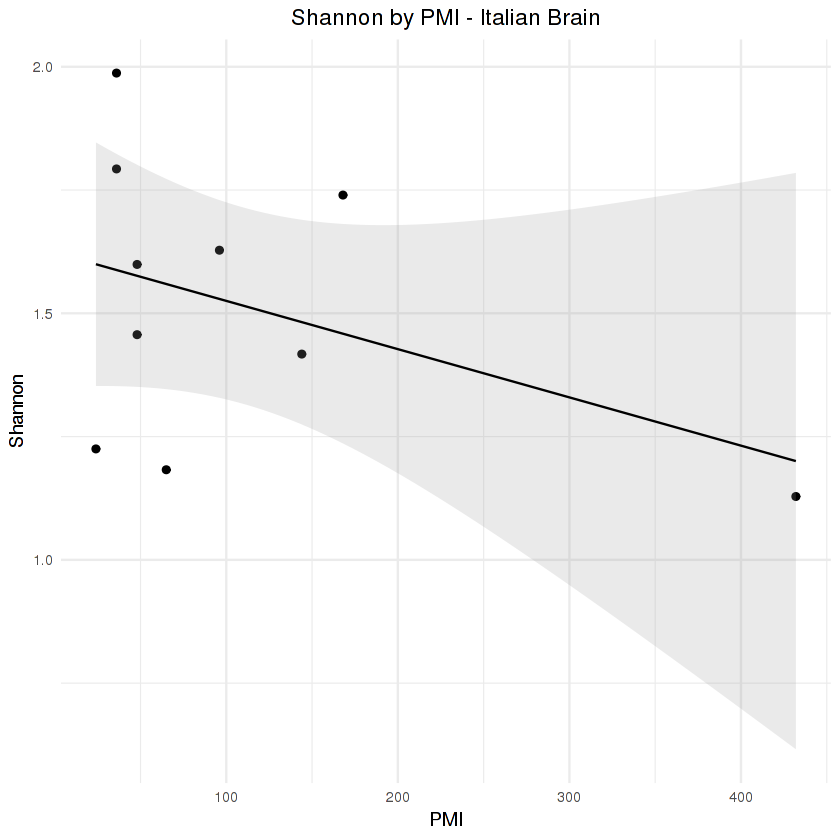

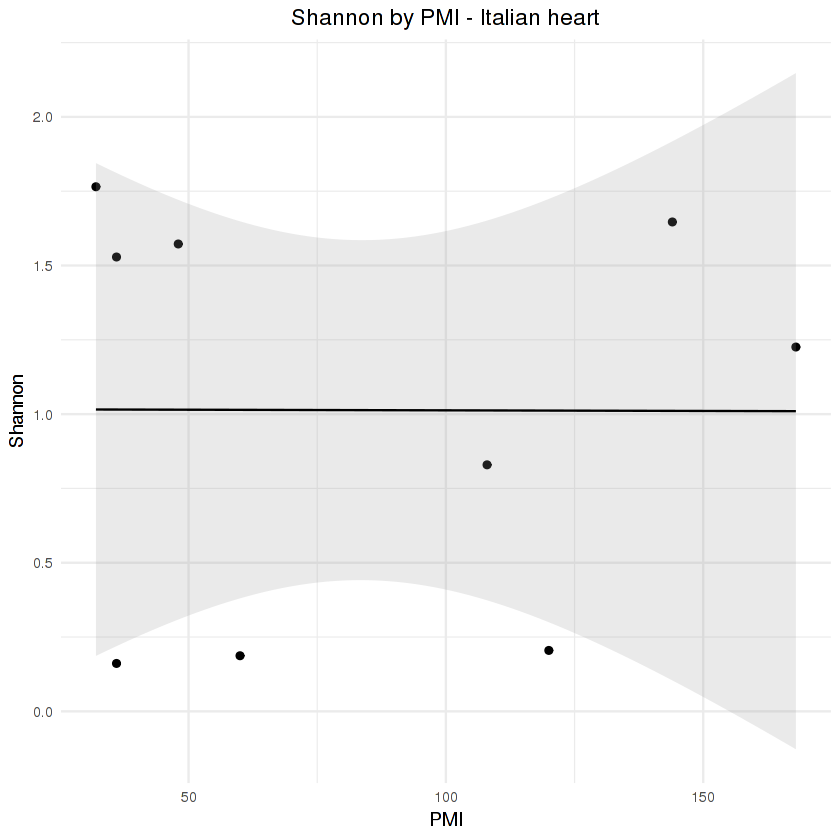

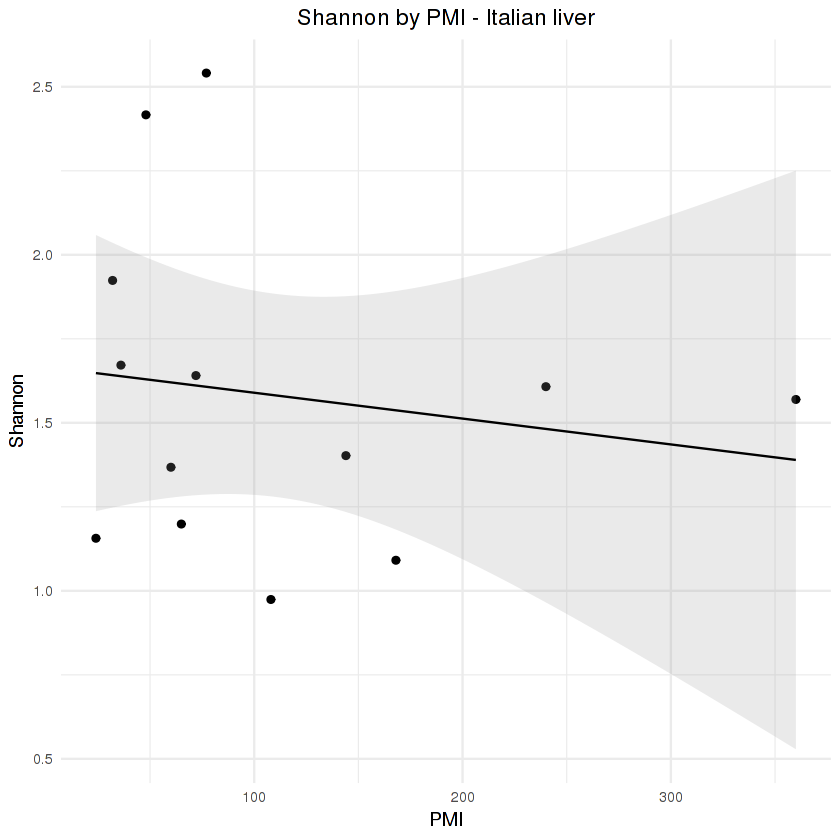

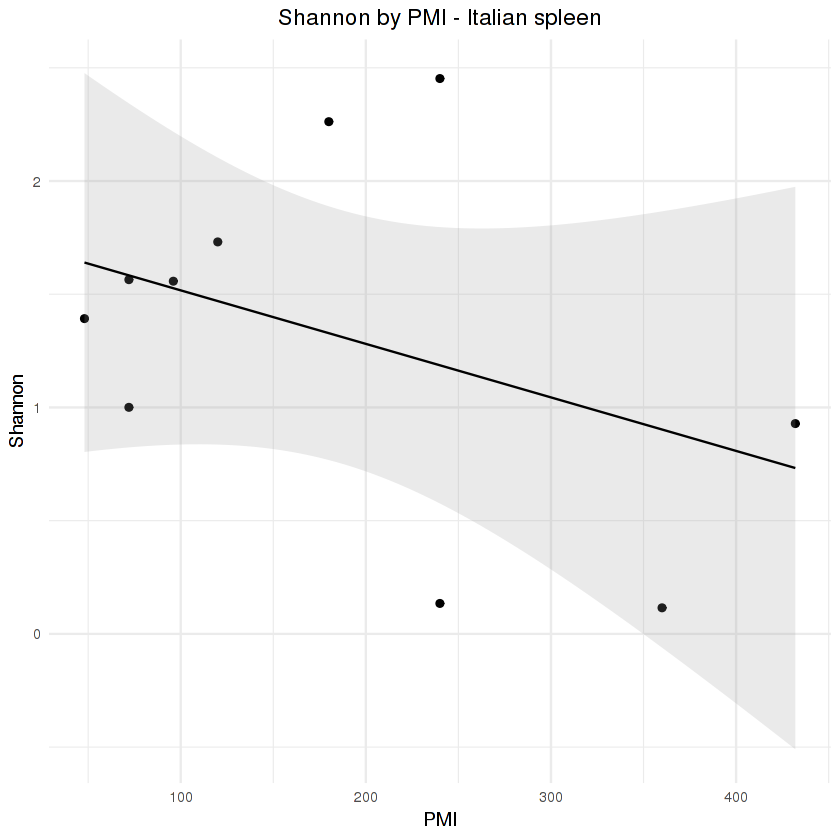

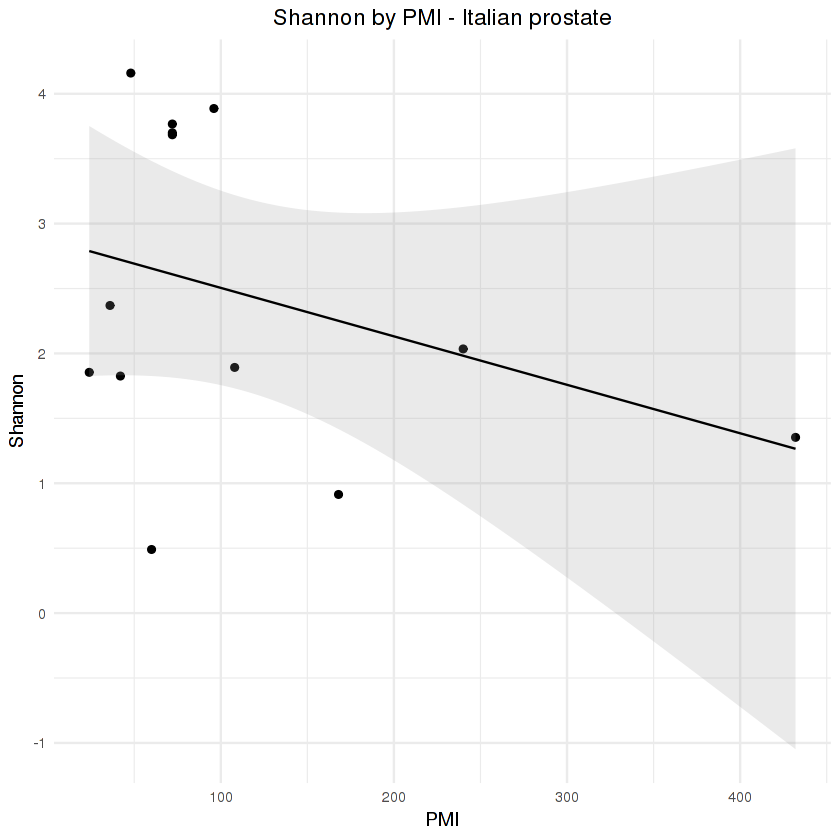

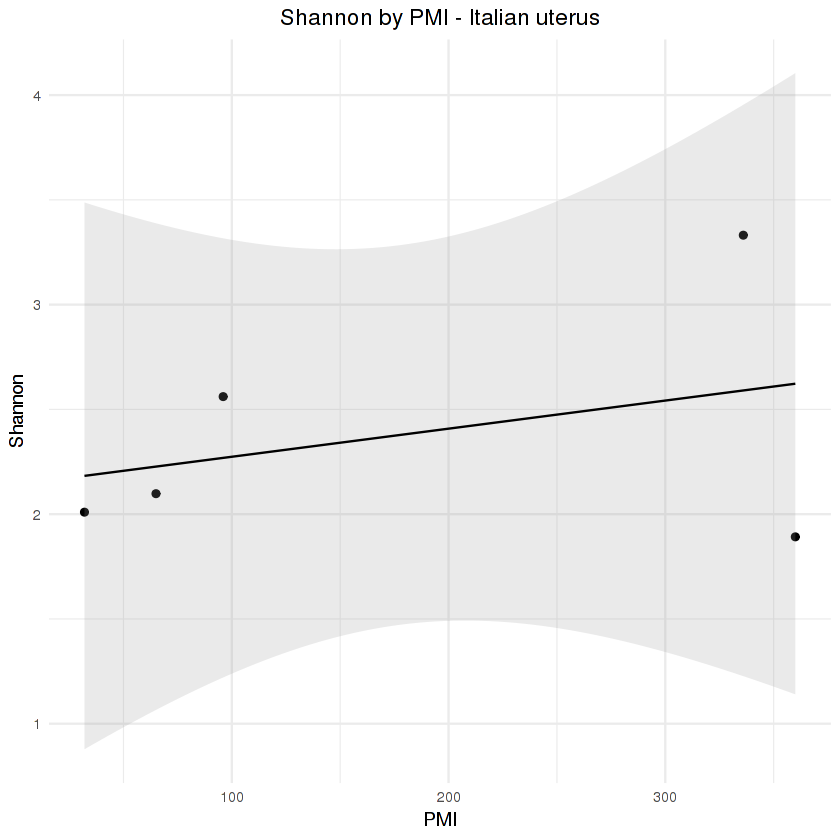

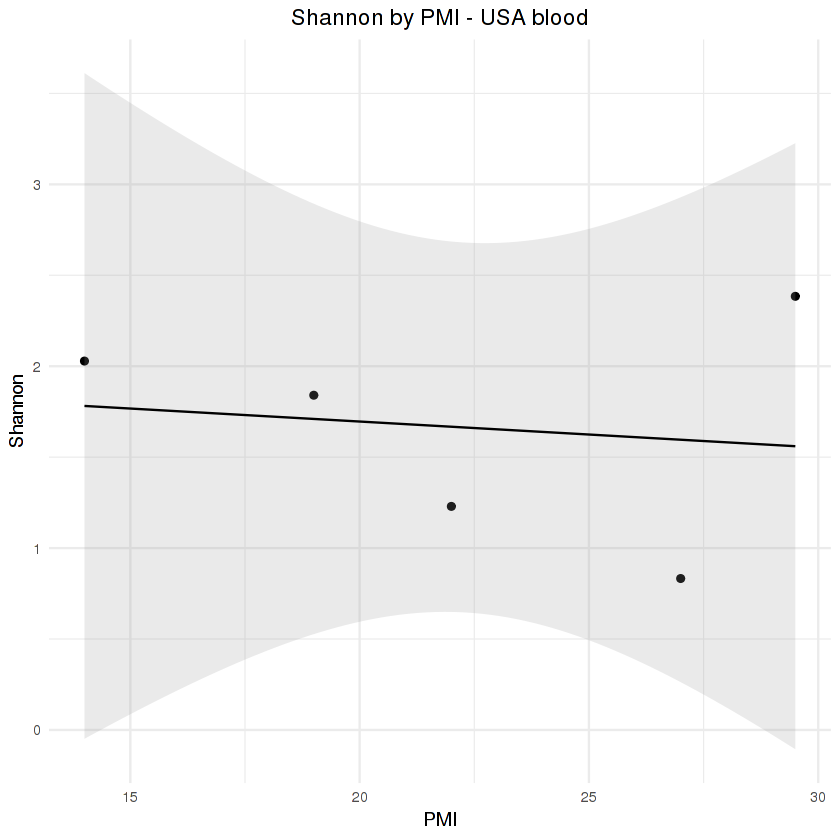

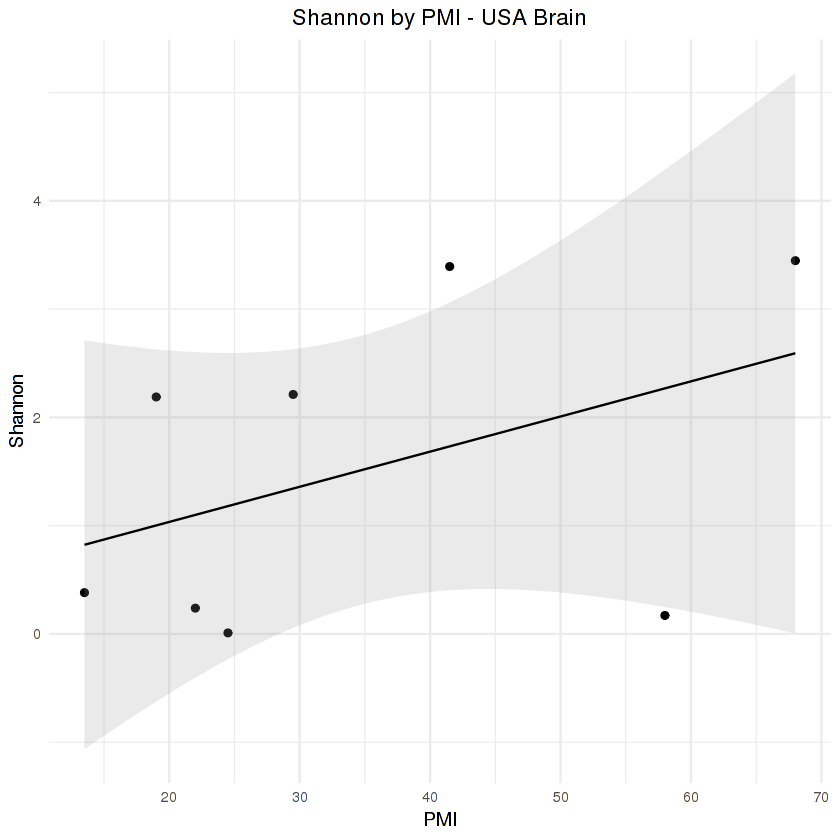

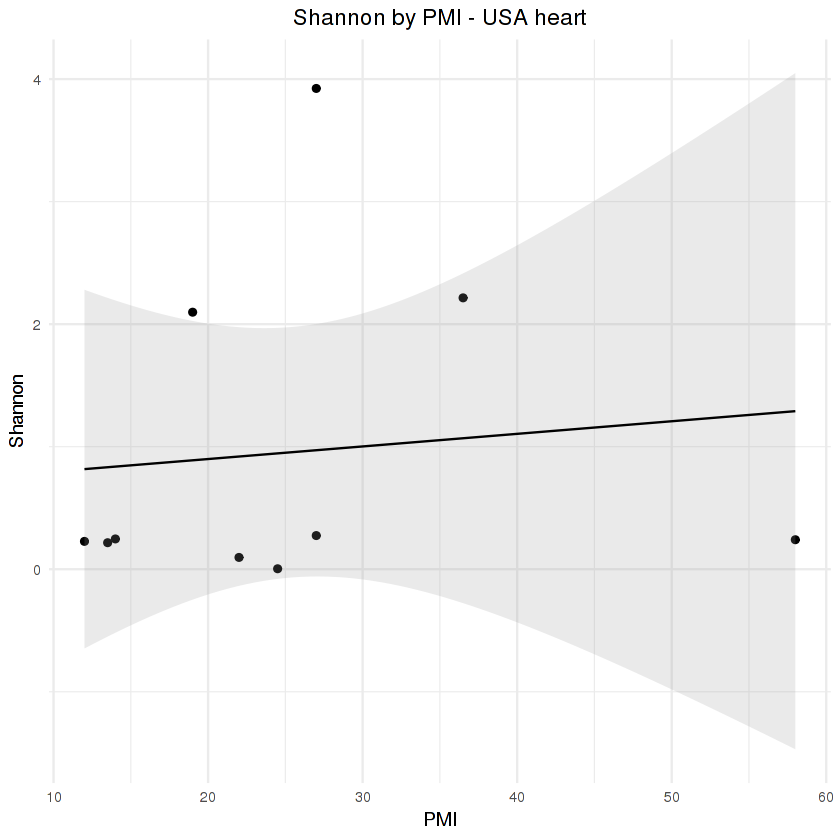

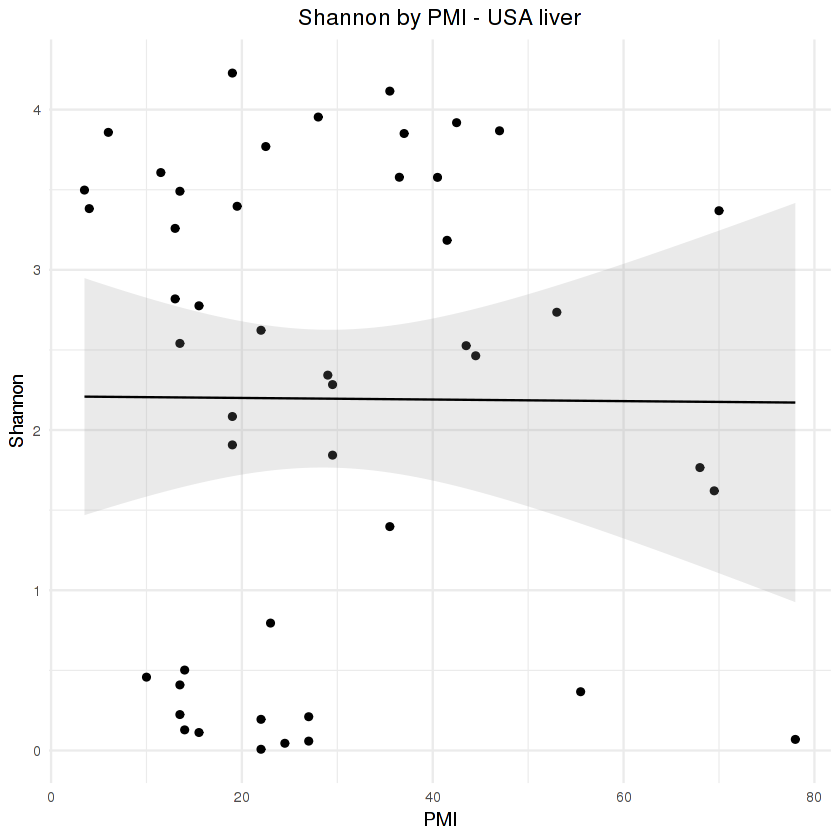

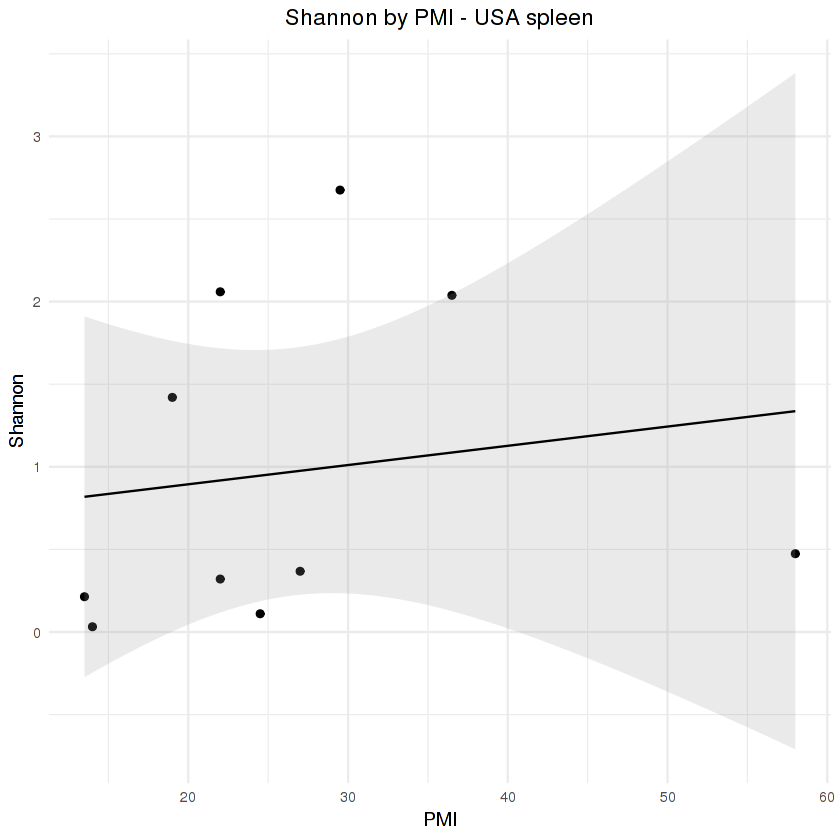

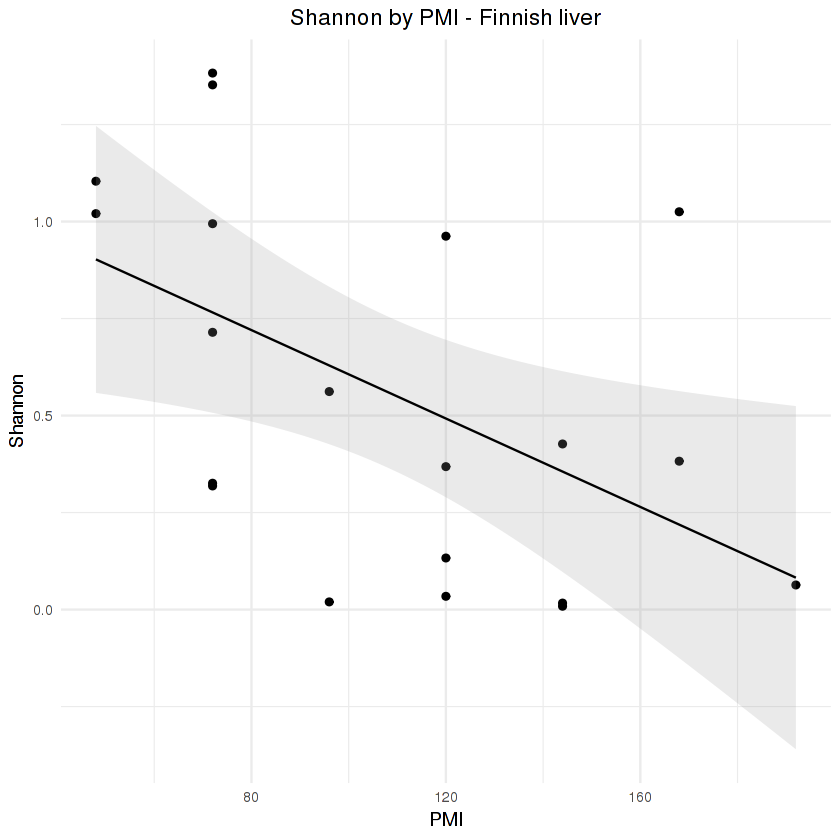

In [23]:
p1 
p2 
p3
p4
p5
p6
p7
p8
p9
p10
p11
p12

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


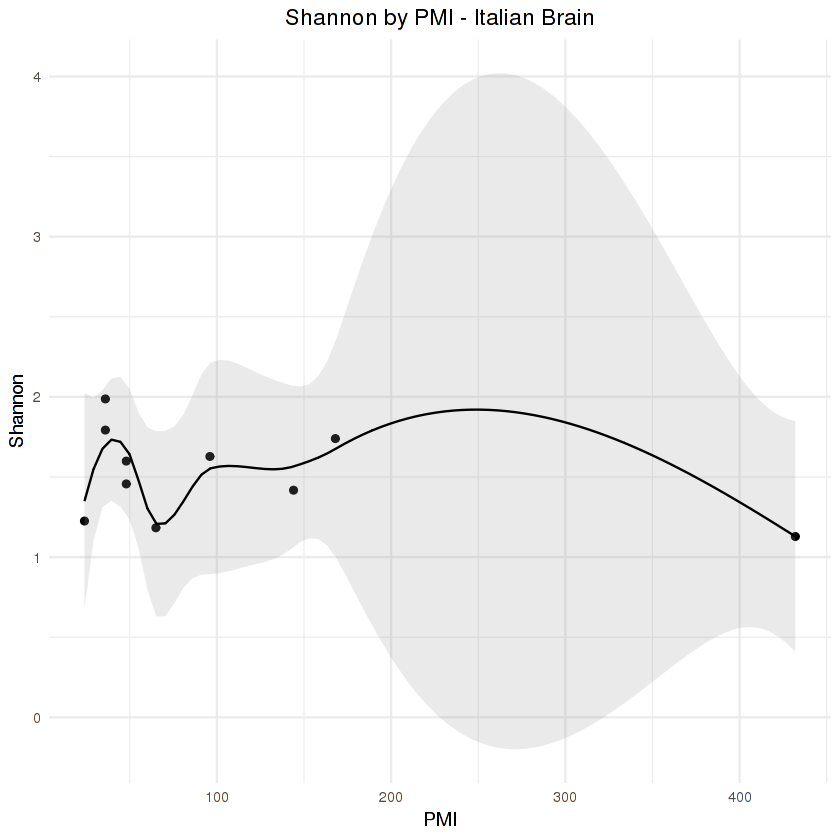

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


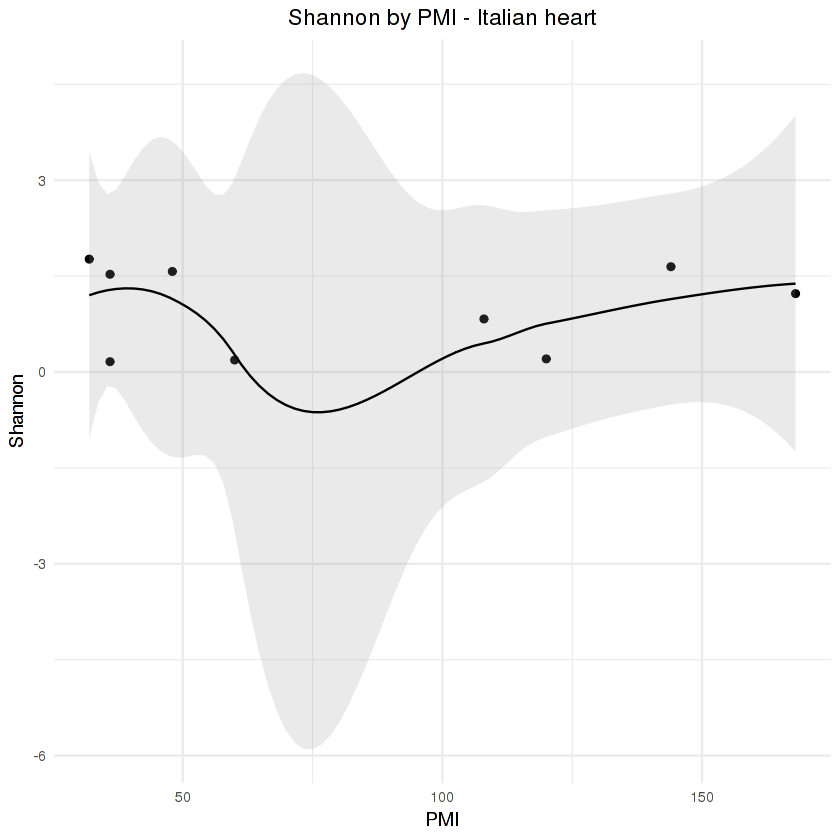

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


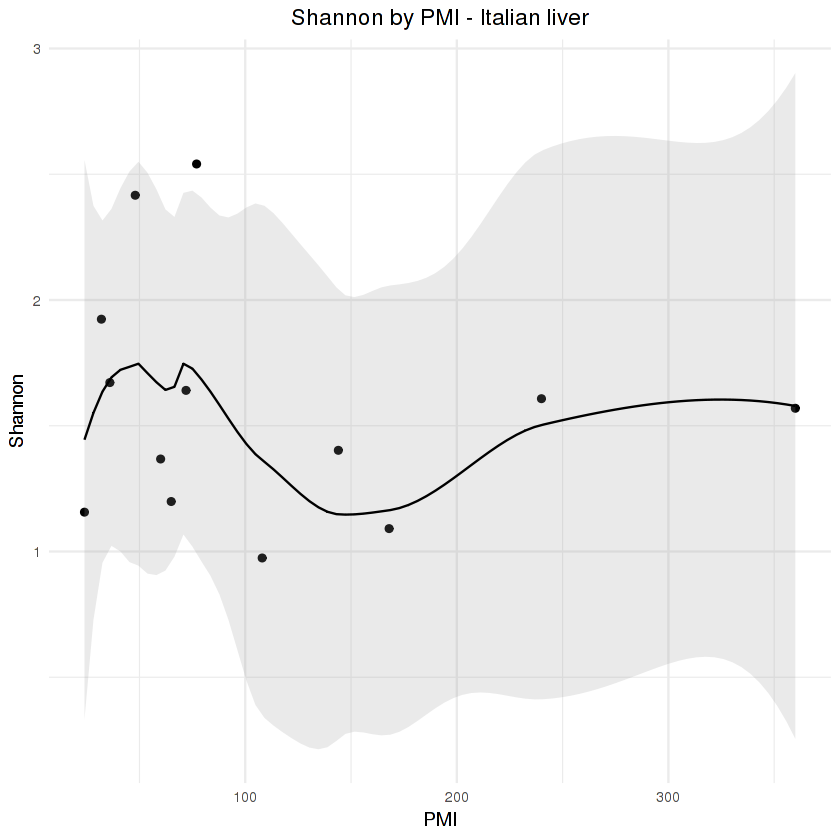

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


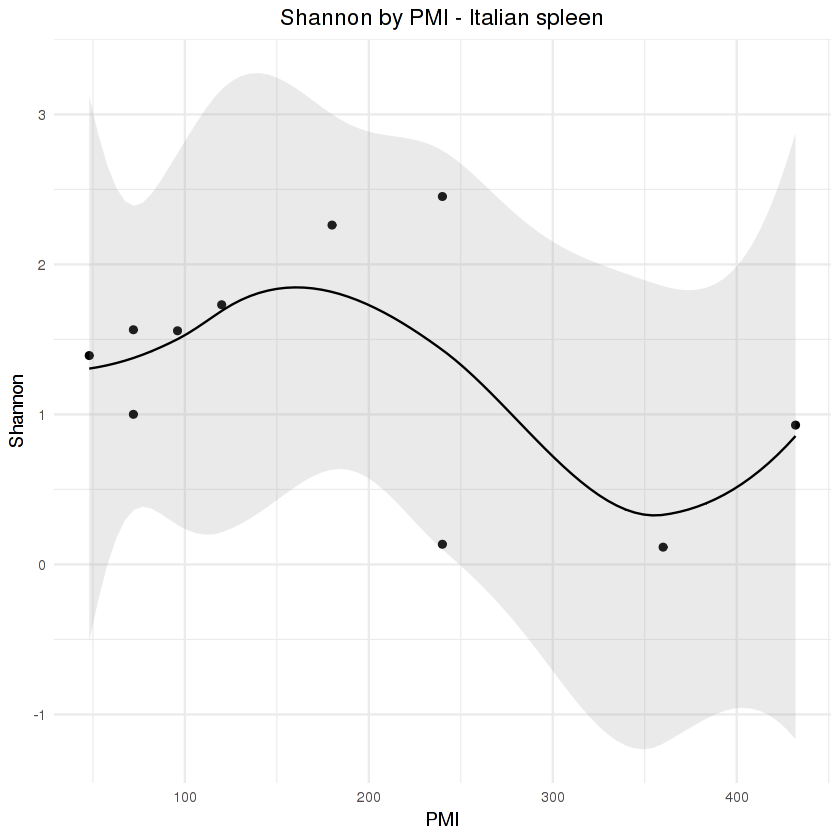

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 30.36”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 65.64”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 70565”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, new

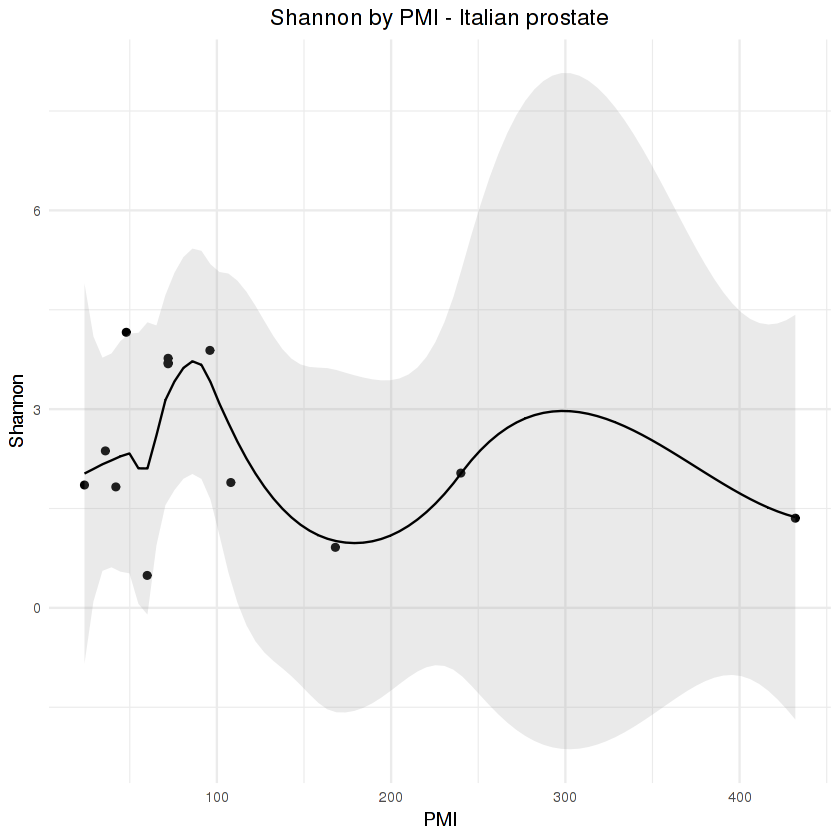

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 13.922”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 8.0775”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 57.419”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, 

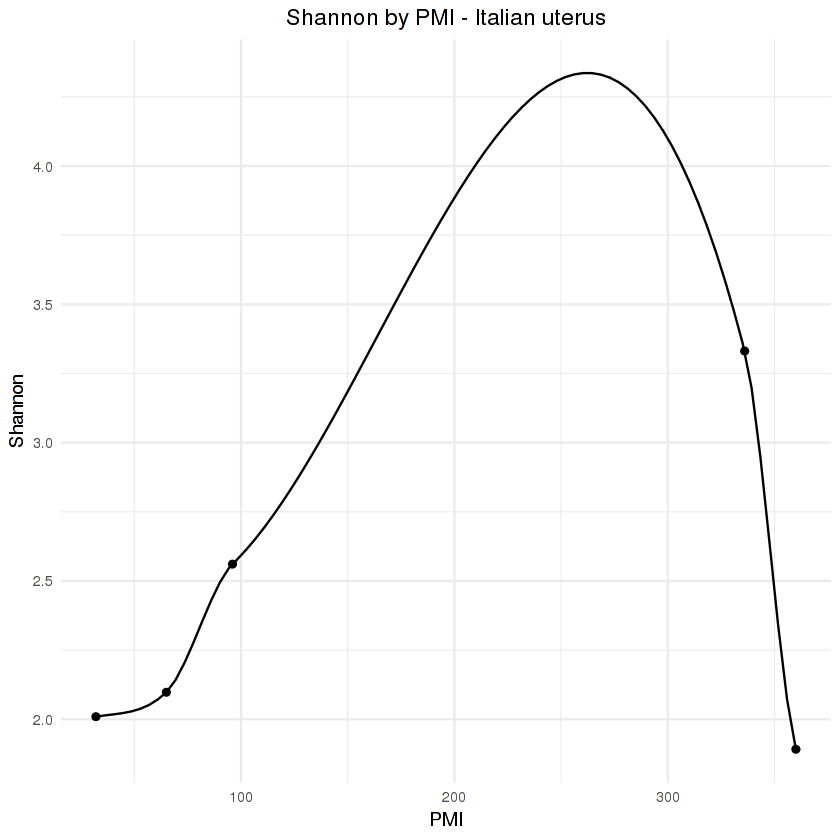

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


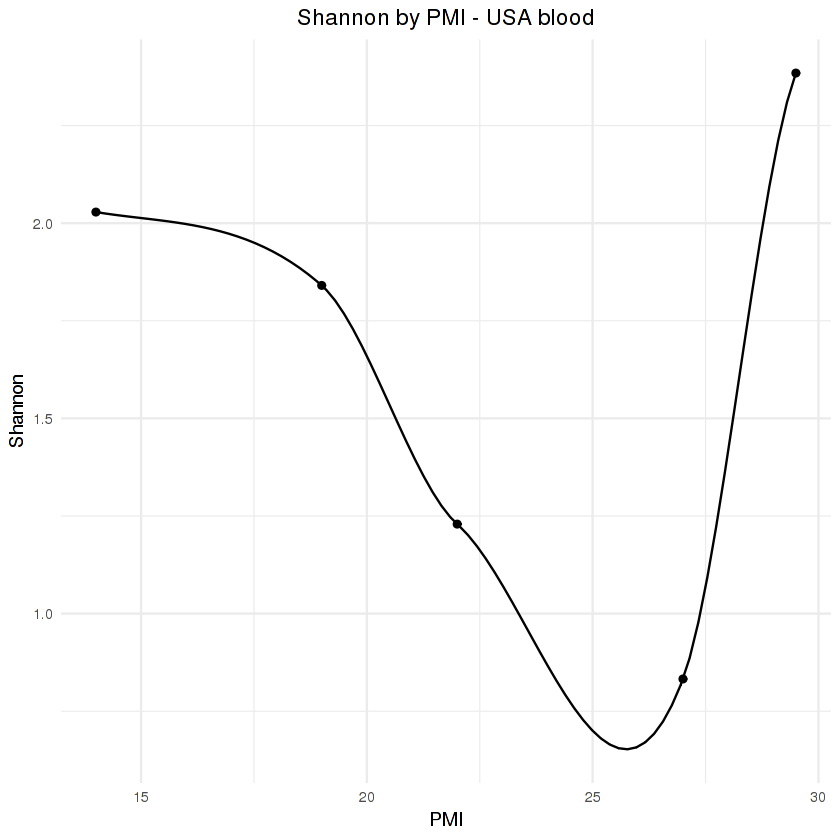

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


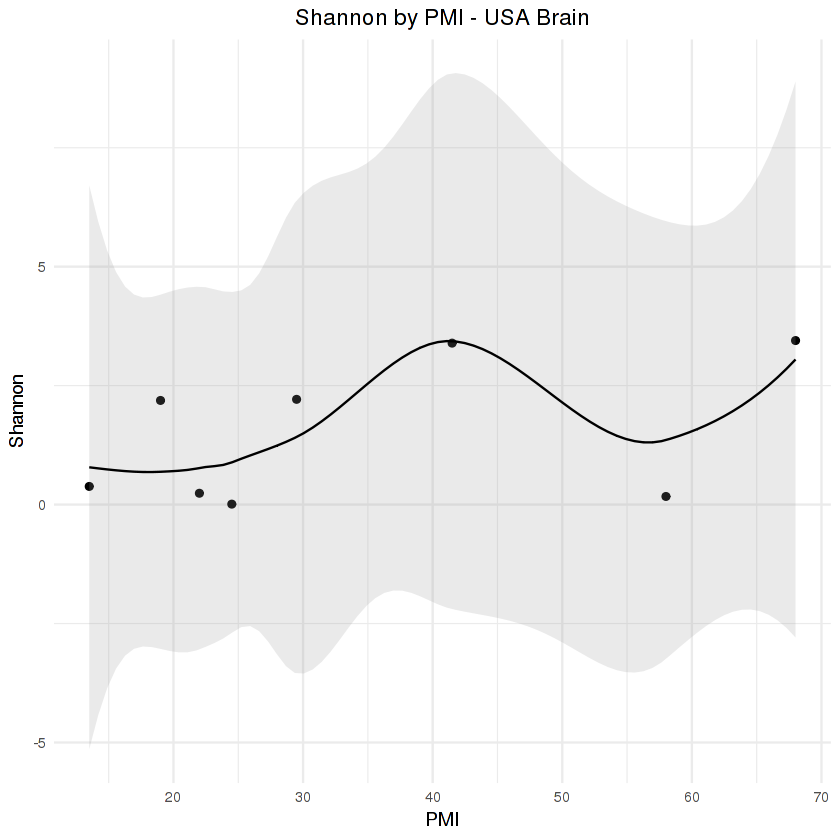

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


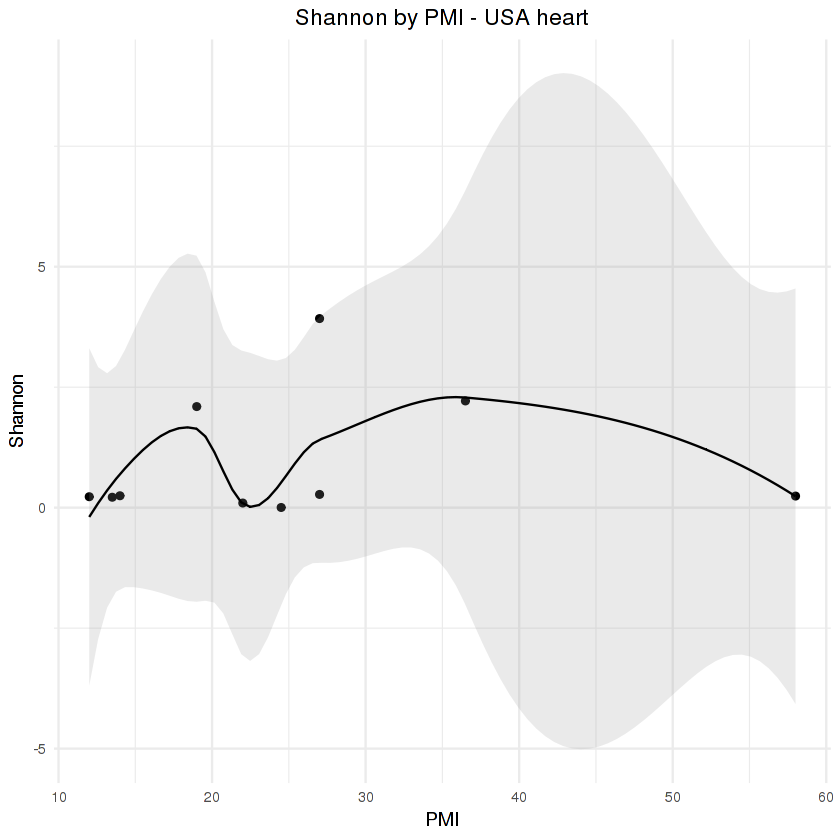

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


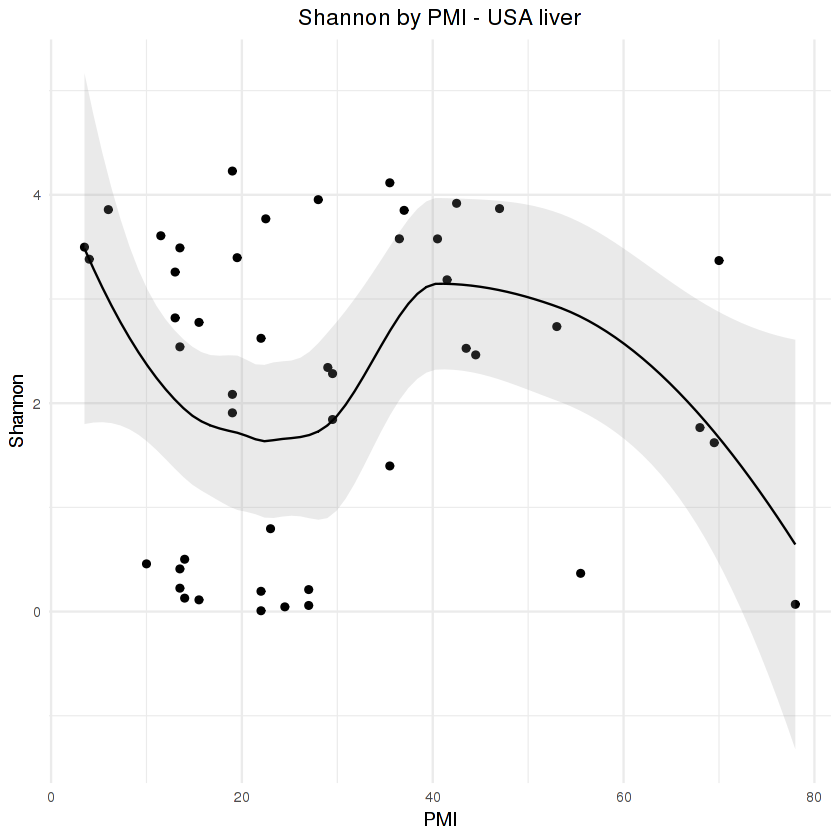

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


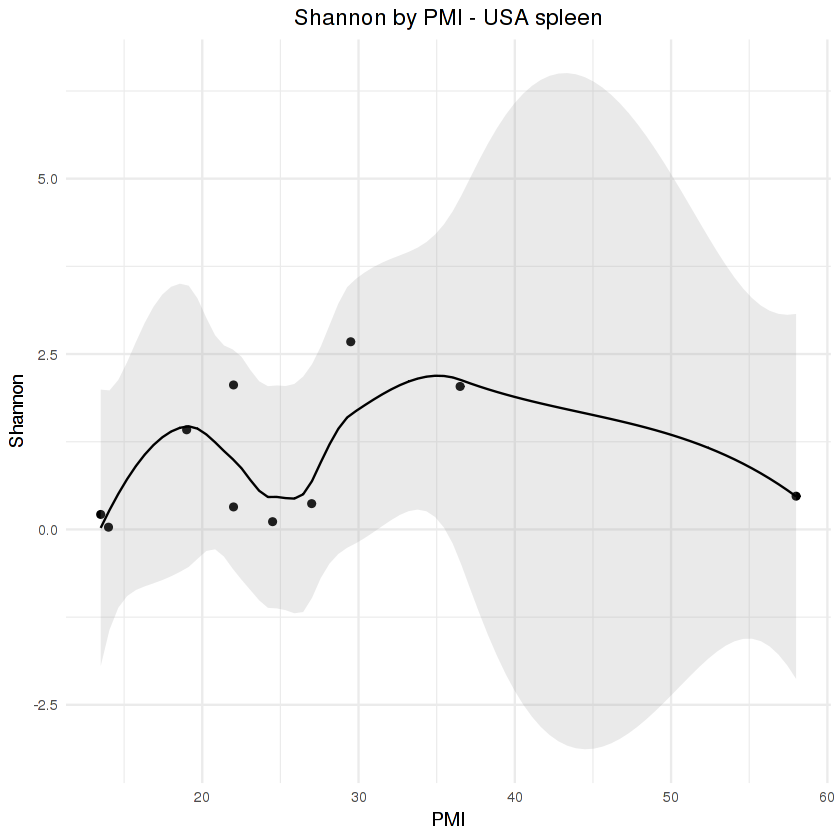

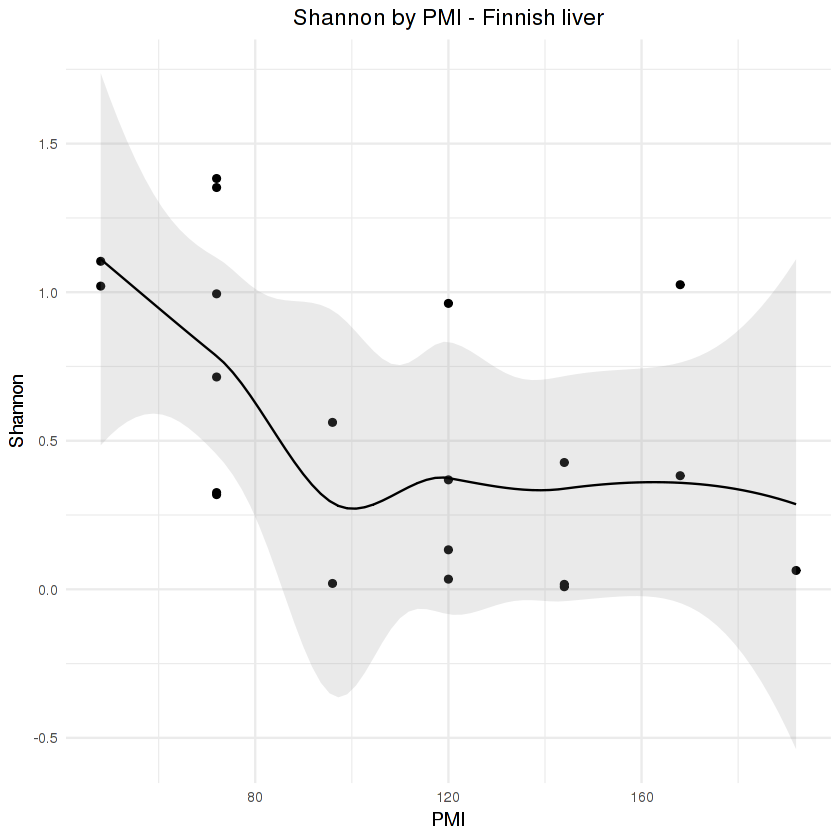

In [96]:
p1b 
p2b 
p3b
p4b
p5b
p6b
p7b
p8b
p9b
p10b
p11b
p12b